### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
62      6
88      6
101     6
160     6
102     5
76      5
145     5
82      5
84      5
97      5
111     4
92      4
86      4
123     4
73      3
182     3
90      3
121     3
207     3
152     3
85      3
176     2
?       2
184     2
100     2
162     2
155     2
112     2
94      2
156     2
161     2
52      2
56      2
72      1
60      1
58      1
135     1
142     1
288     1
64      1
134     1
154     1
175     1
78      1
115     1
120     1
262     1
48      1
200     1
106     1
140     1
55      1
143     1
Name: horsepower, dtype: int64

In [7]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
168     5
95      5
94      5
85      5
103     5
102     5
65      5
74      5
118     4
122     4
93      4
148     4
106     4
154     3
125     3
137     3
83      3
115     3
101     3
87      2
153     2
81      2
129     2
113     2
192     2
110     2
158     2
194     2
188     2
164     2
145     2
108     2
89      2
119     2
197     2
186     1
256     1
142     1
107     1
90      1
121     1
98      1
77      1
231     1
78      1
Name: normalized-losses, dtype: int64

In [8]:
#replacing the missing values with their mean value
df["horsepower"].replace("?", np.nan, inplace=True)
df["horsepower"] =df["horsepower"].astype("float")
npmean = df["horsepower"].mean()
df["horsepower"].fillna(npmean, inplace=True)
df["horsepower"].value_counts()

68.000000     19
70.000000     11
69.000000     10
116.000000     9
110.000000     8
95.000000      7
88.000000      6
114.000000     6
62.000000      6
160.000000     6
101.000000     6
97.000000      5
102.000000     5
82.000000      5
76.000000      5
84.000000      5
145.000000     5
86.000000      4
111.000000     4
123.000000     4
92.000000      4
207.000000     3
85.000000      3
152.000000     3
73.000000      3
182.000000     3
121.000000     3
90.000000      3
56.000000      2
155.000000     2
162.000000     2
94.000000      2
52.000000      2
104.256158     2
176.000000     2
112.000000     2
100.000000     2
161.000000     2
156.000000     2
184.000000     2
288.000000     1
140.000000     1
175.000000     1
78.000000      1
48.000000      1
134.000000     1
120.000000     1
60.000000      1
106.000000     1
142.000000     1
58.000000      1
72.000000      1
64.000000      1
135.000000     1
262.000000     1
154.000000     1
143.000000     1
55.000000      1
200.000000    

In [9]:
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["normalized-losses"] =df["normalized-losses"].astype("float")
npmean = df["normalized-losses"].mean()
df["normalized-losses"].fillna(npmean, inplace=True)
df["normalized-losses"].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
134.0     6
104.0     6
128.0     6
103.0     5
102.0     5
74.0      5
65.0      5
168.0     5
85.0      5
95.0      5
94.0      5
118.0     4
93.0      4
106.0     4
148.0     4
101.0     3
115.0     3
125.0     3
83.0      3
154.0     3
137.0     3
108.0     2
145.0     2
188.0     2
81.0      2
158.0     2
129.0     2
197.0     2
153.0     2
192.0     2
164.0     2
194.0     2
110.0     2
113.0     2
89.0      2
119.0     2
87.0      2
256.0     1
90.0      1
142.0     1
78.0      1
186.0     1
231.0     1
107.0     1
98.0      1
121.0     1
77.0      1
Name: normalized-losses, dtype: int64

#### Visualization of the Data

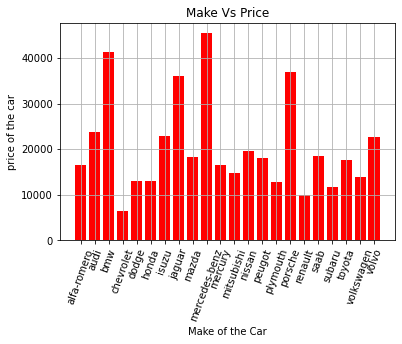

In [10]:
plt.bar("make","price", data = df, color = "red")
plt.xticks(rotation=70)
plt.xlabel("Make of the Car")
plt.ylabel("price of the car")
plt.title("Make Vs Price")
plt.grid()
plt.show()

- By the above visualtization it is seen that Mercedes Benz has the highest price above $45000.
- BMW, Audi and Porsche comes after that 

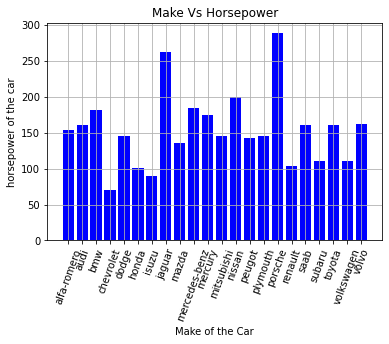

In [11]:
plt.bar("make","horsepower", data = df, color = "blue")
plt.xticks(rotation=70)
plt.xlabel("Make of the Car")
plt.ylabel("horsepower of the car")
plt.title("Make Vs Horsepower")
plt.grid()
plt.show()

- By this Visulaization it shows that the Brand with Highest Horsepower are Porshce, Jaguar and BMWW

### Handling the Outlier

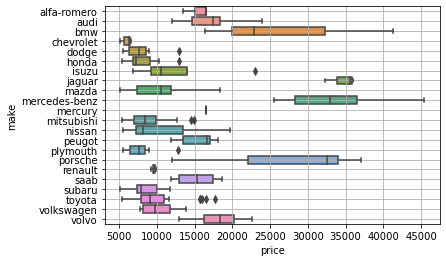

In [12]:
sns.boxplot(data = df, x = "price", y = "make")
plt.grid(True)

In [13]:
df[(df["make"]=="dodge") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [14]:
df[(df["make"]=="honda") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [15]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [16]:
df[(df["make"]=="isuzu") & (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [17]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [18]:
df[(df["make"]=="toyota") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [19]:
df.drop([29,41,83,84,45,124,172,178,179,180,181], inplace = True)

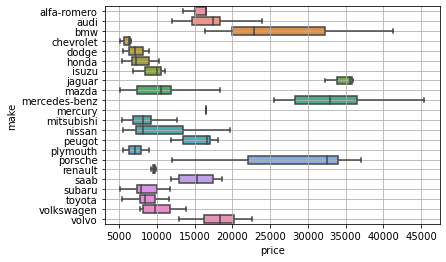

In [20]:
sns.boxplot(data = df, x = "price", y = "make")
plt.grid(True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


#### Label encoding the Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 28.3+ KB


In [23]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64","float64"])

In [24]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [25]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [26]:
df_cat["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [27]:
pd.get_dummies(df_cat["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [28]:
df["make"].nunique()

22

In [29]:
pd.get_dummies(df_cat["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [31]:
from sklearn.preprocessing import LabelEncoder


In [32]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [33]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [34]:
df = pd.concat([df_cat, df_num], axis=1)

In [35]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


#### Dividing the Data into x and y

In [36]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Preprocessing

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [39]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = r2_score(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest, ypred)
    print(f"Accuracy -: {ac}\n\nMSE -:\n{mse}\n\nRMSE -:\n{rmse}\n\nMAE -: {mae}")

In [40]:
models = []

models.append(("Linreg        -: ", LinearRegression()))
models.append(("KNN           -: ", KNeighborsRegressor()))
models.append(("SVM-l         -: ", SVR(kernel="linear")))
models.append(("SVM-r         -: ", SVR(kernel="rbf")))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n")

Linreg        -: 
Accuracy -: 0.773730267617807

MSE -:
17164264.09263911

RMSE -:
4142.97768430378

MAE -: 2862.978078671882



KNN           -: 
Accuracy -: 0.7354891230067488

MSE -:
20065143.04979592

RMSE -:
4479.413248383757

MAE -: 2706.922448979592



SVM-l         -: 
Accuracy -: 0.7093560754688115

MSE -:
22047531.612173293

RMSE -:
4695.479912870813

MAE -: 2890.666286906662



SVM-r         -: 
Accuracy -: -0.2003478916136967

MSE -:
91055431.92979647

RMSE -:
9542.296994424167

MAE -: 5634.141088793915





#### Hyperparameter Tuning

In [41]:
from sklearn.linear_model import Ridge, Lasso

In [42]:
l2 = Ridge(alpha=10)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)
print(r2_score(ytest, ypred))

0.72866626766047


In [43]:
l2.coef_

array([ -161.67047158, -1091.95994427,  -246.0053102 ,  1914.71315327,
        1301.48308582,   138.14429355,   329.09419219,   -13.78251147,
         691.31719053,   327.07563574,    80.726493  ,    60.81704185,
         -32.4908748 ,    38.91463197])

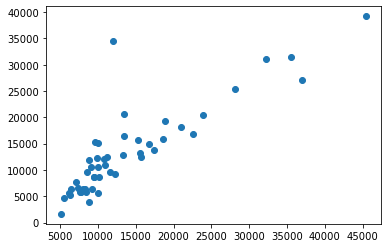

In [44]:
plt.scatter(ytest, ypred)

In [45]:
l1 = Lasso(alpha=10)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.7699917962869316


In [46]:
l1.coef_

array([-1.82882236e+02, -1.37192271e+03,  0.00000000e+00,  2.34944314e+03,
        9.60029642e+03,  1.18880452e+02,  2.46574540e+02, -1.50827921e+01,
        8.61970657e+02,  2.20130885e+02,  7.63189726e+01,  4.18553427e+01,
       -3.22662797e+01, -6.55632273e-01])

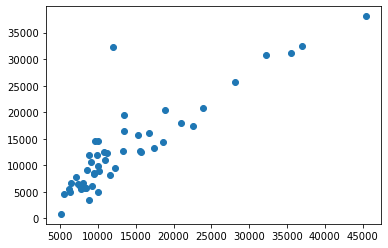

In [47]:
plt.scatter(ytest, ypred)

In [48]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.7737302676178046
1 -: 0.7518429340867678
2 -: 0.7420411306793002
3 -: 0.7368470556772466
4 -: 0.7337956083458914
5 -: 0.7318874901164595
6 -: 0.7306478376489106
7 -: 0.7298247335534228
8 -: 0.7292735249807932
9 -: 0.7289060949022612
10 -: 0.72866626766047
11 -: 0.7285169219002868
12 -: 0.7284328085314543
13 -: 0.7283963430433417
14 -: 0.7283950366881593
15 -: 0.7284198732095152
16 -: 0.7284642526981494
17 -: 0.7285232870611238
18 -: 0.7285933198013379
19 -: 0.7286715924905208
20 -: 0.7287560092842165
21 -: 0.7288449682307082
22 -: 0.7289372388654709
23 -: 0.729031872369603
24 -: 0.7291281349518193
25 -: 0.7292254579964018
26 -: 0.7293234004494682
27 -: 0.7294216202283965
28 -: 0.7295198523446351
29 -: 0.7296178920629219
30 -: 0.7297155818674592
31 -: 0.7298128013256695
32 -: 0.7299094591713355
33 -: 0.7300054870975232
34 -: 0.7301008348736873
35 -: 0.7301954664932812
36 -: 0.7302893571268732
37 -: 0.7303824907074551
38 -: 0.7304748580137008
39 -: 0.730566455146755
40 -: 0.730657

In [49]:
l2 = Ridge(alpha=0)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)

print(r2_score(ytest, ypred))

0.7737302676178046


In [50]:
for i in range(0,1000,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    print(f"{i} -: {l1.score(xtest, ytest)}")

0 -: 0.7737302676178069
50 -: 0.7506461701495694
100 -: 0.7189785263379442
150 -: 0.7163098206915988
200 -: 0.7207591756859897
250 -: 0.7211609660172624
300 -: 0.7207342085673817
350 -: 0.7217125685528865
400 -: 0.7222711582449708
450 -: 0.7218732080868915
500 -: 0.7212772634035048
550 -: 0.7220728998633944
600 -: 0.723172604920933
650 -: 0.7242078927282716
700 -: 0.7251752855488806
750 -: 0.7260748167816642
800 -: 0.7269135026336293
850 -: 0.7276826592903824
900 -: 0.7283856994270395
950 -: 0.7290228559971043


In [51]:
l1 = Lasso(alpha=0)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.7737302676178069


In [52]:
cvs = cross_val_score(l2, x,y,cv=4)
cvs

array([ 7.51352795e-01,  8.57869101e-01, -1.61916999e+27,  3.81584948e-01])

In [53]:
 cvs.mean()

-4.0479249637304396e+26

In [54]:
cvs1 = cross_val_score(l1, x,y,cv=4)
cvs1

array([0.75135279, 0.8578691 , 0.37303229, 0.38158495])

In [55]:
cvs1.mean()

0.590959782108395

#### CONCLUSION

- As we can deduce the best fit model for this Dataset is LinearRegression
- The accuracy of this model is 77%